In [1]:
#!pip install opencv-python numpy pandas tensorflow keras Pillow imutils

# 導入資料庫

In [2]:
import os
import cv2
import imutils
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, AveragePooling2D
from keras.optimizer_v2.rmsprop import RMSprop
from keras.optimizer_experimental.sgd import SGD
from keras.optimizer_v2.adam import Adam
from keras.utils import np_utils


# load_data的定義

In [3]:
def load_data():
  train_data = np.empty((train_num,150,90,3),dtype="float32")
  train_label = np.empty((train_num,),dtype="uint8")
  train_dir = os.listdir("data__train")
  for i in range(train_num):
    train_image = Image.open("data__train/"+train_dir[i])
    train_array = np.asarray(train_image,dtype="float32")
    train_data[i, :, :, :] = train_array
    train_label[i] = float(ord(train_dir[i].split('_')[0]))
    if(train_label[i]>=64):#
      train_label[i] -= 55
    else:
      train_label[i] -= 48

  test_data = np.empty((test_num,150,90,3),dtype="float32")
  test_label = np.empty((test_num,),dtype="uint8")
  test_dir = os.listdir("data__test")
  for i in range(test_num):
    test_image = Image.open("data__test/"+test_dir[i])
    test_array = np.asarray(test_image,dtype="float32")
    test_data[i, :, :, :] = test_array
    # test_label[i] = int(ord(test_dir[i].split('_')[0]))
    test_label[i] = float(ord(test_dir[i].split('_')[0]))
    if(test_label[i]>=64):
      test_label[i] -= 55
    else:
      test_label[i] -= 48
  
  return (train_data,train_label), (test_data,test_label)

# 參數設定

In [4]:
batch_size = 128
num_classes = 26+10
epochs = 20       

train_num = 1637
test_num = 428
image_size = 150*90*3

# 資料前處理

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

1637 train samples
428 test samples


# model製造

In [6]:
model = Sequential()
#Layer1  卷積層
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape= x_train[0].shape, padding="same"))
#Layer2  池化層
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
#Layer3  卷積層
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'))
#Layer4  池化層
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
#Layer5  
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
#Layer6
model.add(Dense(84, activation='tanh'))
#Layer7  輸出層
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

train_history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 90, 6)        456       
                                                                 
 average_pooling2d (AverageP  (None, 75, 45, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 45, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 23, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 13984)             0         
                                                                 
 dense (Dense)               (None, 120)               1

# 畫出訓練中的accuracy和loss function

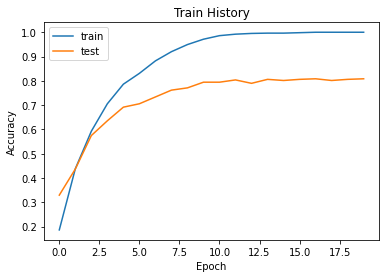

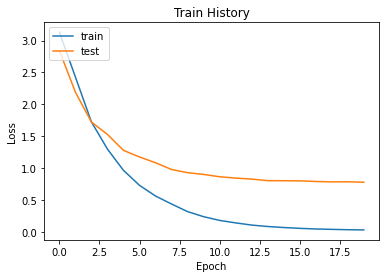

success


In [7]:
def show_train_history_acc(train_acc,test_acc):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def show_train_history_loss(train_acc,test_acc):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

show_train_history_acc('acc','val_acc')

show_train_history_loss('loss','val_loss')

# Save model
try:
  model.save_weights("car_lenet_numberandletter.h5")
  print("success")
except:
  print("error")